# Assignment: Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений `n` (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

**Обратите внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

# Решение 

## Распределение Парето 

[Распределение Парето](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE) - двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других. Вне области экономики иногда называется также распределением Брэдфорда.

**Основные формулы распределения Парето:**

$$    
\begin{align}
    f(x) = \frac{kx^{k}_{m}}{x^{k + 1}} \: (1) && EX = \frac{kx_{m}}{k - 1}, \: k > 1 \: (2) && DX = (\frac{x_{m}}{k - 1})^2\frac{k}{k - 2}, \: k > 2 \: (3)
\end{align}
$$

**Центральная предельная теорема:**

 
$$    
\begin{align}
    \overline{X}_n  \approx  \sim N(EX, \frac{DX}{n}) \: (4)
\end{align}
$$


**Функция плотности нормального распределения (Функция Гаусса):**

$$    
\begin{align}
     f(x) = \frac{1}{ \sigma  \sqrt{2 \pi } } e^-\frac{(x -  \mu)^2}{2 \sigma ^2} \: (5)
\end{align}
$$
    
    

### Импорт библиотек и график распределения 

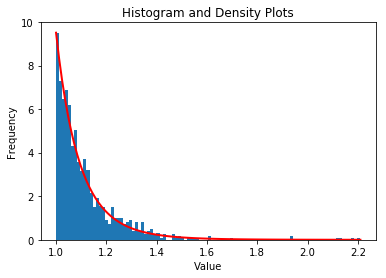

In [28]:
import numpy as np
import matplotlib.pyplot as plt

k, x = 10., 1.
s = (np.random.pareto(k, 1000) + 1) * x

count, bins, _ = plt.hist(s, 100, normed=True)
fit = k*x**k / bins**(k+1) #Формула плотности распределения Парето (1)
plt.plot(bins, max(count)*fit/max(fit), linewidth = 2, color='r') #Приведение плотности распределения к масштабу графика
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram and Density Plots')
plt.show()

### Расчет теоретических среднего и дисперсии

In [31]:
#среднее (2)
mu = k*x/(k-1) 

#дисперсия (3)
sigma = ((x/(k-1))**(1/2))*(k/(k-2))

### Генерация выборок при разных n 

In [32]:
#Список выборочных средних (avgs) будет состоять из трех подсписков (new_avgs), 
#каждый из которых будет содержать 1000 выборочных средних для разных n (7, 17, 77) 

avgs = []

for n in (7, 17, 77):
    new_avgs = []
    for i in range(0, 1000):
        sample = (np.random.pareto(k, n) + 1) * x
        new_avgs.append(np.mean(sample))
        i += 1
    avgs.append(new_avgs)    

### Функции для расчета среднеквадратического отклонения и плотности вероятности

In [41]:
#Среднеквадратическое отклонение по ЦПТ для различных n (4)
def normal_deviation(n):
    return (sigma/n)**(1/2)

#Функция плотности вероятности нормального распределения для построения графика (5)
def normal_density(n, bins = bins, mu = mu, sigma = sigma):
    return (1 / (np.sqrt(2 * np.pi) * normal_deviation(n))) * \
    (np.power(np.e, -(np.power((bins - mu), 2) / (2 * np.power(normal_deviation(n), 2))))) 

### Графики 

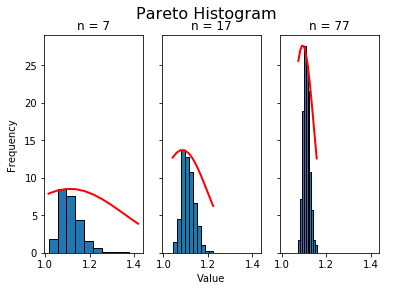

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex = True)
f.add_subplot(111, frameon=False)
plt.suptitle('Pareto Histogram', fontsize=16)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Value")
plt.ylabel("Frequency")
count, bins, _ = ax1.hist(avgs[0], edgecolor = "black", normed = True)
ax1.plot(bins, max(count)*normal_density(7)/max(normal_density(7)), linewidth = 2, color='r')
ax1.set_title('n = 7')
count, bins, _ = ax2.hist(avgs[1], edgecolor = "black", normed=True)
ax2.plot(bins, max(count)*normal_density(7)/max(normal_density(7)), linewidth = 2, color='r')
ax2.set_title('n = 17')
count, bins, _ = ax3.hist(avgs[2], edgecolor = "black", normed=True)
ax3.plot(bins, max(count)*normal_density(7)/max(normal_density(7)), linewidth = 2, color='r')
ax3.set_title('n = 77')
plt.show()

### Вывод 

На графике видим, что с ростом количества наблюдений в выборках (n) увеличивается точность аппроксимации, иными словами, распределение выборочных средних приближается к нормальному. Также наблюдаем, что распределение смещенное (skew), с левой стороны средних меньше, чем с правой.